In [1]:
# %matplotlib widget

import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import os
import pandas as pd
import seaborn as sns

import sys
sys.path.append( '../src/' )

from datetime import timedelta
from mpl_toolkits.mplot3d import Axes3D
from ml.visualization import *


# Data preparation

In [2]:
path = [ '../', 'datasets' ]
file = 'ds-gym-1sec.csv'

df = pd.read_csv( os.path.join( *path, file ), parse_dates = [ 'date' ] ).drop( 'alt', axis = 1 )
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10129 entries, 0 to 10128
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    10129 non-null  datetime64[ns]
 1   pre     10129 non-null  float64       
 2   hum     10125 non-null  float64       
 3   tem     10129 non-null  float64       
 4   occ     10129 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 395.8+ KB


## - Adding seconds resolution to time index

In [3]:
df[ 'seconds' ] = df.groupby( pd.Grouper( key = 'date', freq = 'min' ) ).cumcount()
df[ 'date' ] = df.date + pd.to_timedelta( df.seconds, unit = 's' )
df = df.drop( columns = [ 'seconds' ] ).drop_duplicates( subset = [ 'date' ] ) # it were generated 2 duplicates, strange
df[ 'location' ] = [ 'gym' ] * len( df )

In [4]:
df

,date,pre,hum,tem,occ,location
0,2019-09-18 19:04:00,95006.28,58.69,27.17,M,gym
1,2019-09-18 19:04:01,95004.94,58.67,27.17,M,gym
2,2019-09-18 19:04:02,95002.38,58.66,27.17,M,gym
3,2019-09-18 19:04:03,95003.33,58.59,27.18,M,gym
4,2019-09-18 19:04:04,95003.33,58.55,27.18,M,gym
...,...,...,...,...,...,...
10124,2019-09-24 16:17:05,94960.91,56.44,28.61,M,gym
10125,2019-09-24 16:17:06,94958.60,56.48,28.61,M,gym
10126,2019-09-24 16:17:07,94958.60,56.72,28.63,M,gym
10127,2019-09-24 16:17:08,94961.06,56.99,28.64,M,gym


## - Checking missing values

In [5]:
np.sum( df.isnull() )

date        0
pre         0
hum         4
tem         0
occ         0
location    0
dtype: int64

In [6]:
df[ 'hum' ].fillna( method ='ffill', inplace = True )
np.sum( df.isnull() )

date        0
pre         0
hum         0
tem         0
occ         0
location    0
dtype: int64

## - Checking for errors in dates

In [7]:
df.set_index( 'date' ).resample( 'D' ).first().dropna()

,pre,hum,tem,occ,location
date,,,,,
2019-01-10,95357.56,59.89,26.78,M,gym
2019-09-18,95006.28,58.69,27.17,M,gym
2019-09-23,95210.48,59.50,25.95,M,gym
2019-09-24,95352.31,57.63,26.99,M,gym
2019-09-25,95238.48,63.04,27.01,L,gym
2019-10-02,95175.83,61.08,27.10,L,gym


There was not collection on 2019-01-10 (january the tenth). It mus be an error on date format for 2019-10-01 (october the first).

In [8]:
days_from_january_to_october = 264
temp = df[ ( df.date >= '2019-01-01' ) & ( df.date <= '2019-02' ) ][ 'date' ] + timedelta( days = days_from_january_to_october )
df.loc[ temp.index, 'date' ] = temp

In [9]:
df.set_index( 'date', inplace = True )
df.sort_values( by = 'date', inplace = True )
df.resample( 'D' ).first().dropna()

,pre,hum,tem,occ,location
date,,,,,
2019-09-18,95006.28,58.69,27.17,M,gym
2019-09-23,95210.48,59.50,25.95,M,gym
2019-09-24,95352.31,57.63,26.99,M,gym
2019-09-25,95238.48,63.04,27.01,L,gym
2019-10-01,95357.56,59.89,26.78,M,gym
2019-10-02,95175.83,61.08,27.10,L,gym


# Visualizations

In [10]:
sns.set_theme( style = "whitegrid" )

colors = {
    'E': 'blue',
    'L': 'gold',
    'M': 'darkorange',
    'H': 'red' 
}

out_path = [ '..', 'assets' ]

## - Data by day and occupancy level

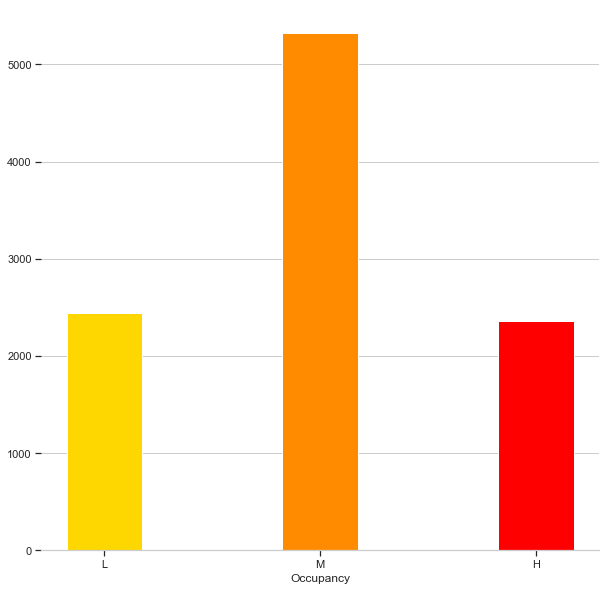

,pre,hum,tem,location
occ,,,,
H,2358,2358,2358,2358
L,2442,2442,2442,2442
M,5327,5327,5327,5327


In [11]:
fig = plot_objects( df, colors, [ 'L', 'M', 'H' ], figsize = ( 10, 10 ) )
fig.savefig( os.path.join( *out_path, 'gym-counting.png' ) )
df.groupby( 'occ' ).count()

## - Data over time

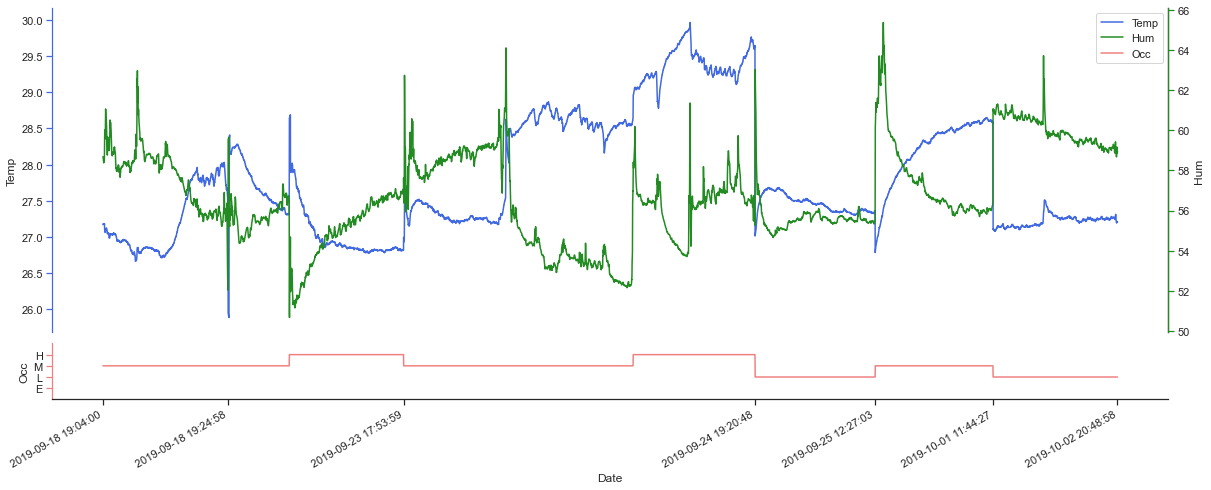

,pre,hum,tem,occ,location
date,,,,,
2019-09-18,1249,1249,1249,1249,1249
2019-09-19,0,0,0,0,0
2019-09-20,0,0,0,0,0
2019-09-21,0,0,0,0,0
2019-09-22,0,0,0,0,0
2019-09-23,1752,1752,1752,1752,1752
2019-09-24,3508,3508,3508,3508,3508
2019-09-25,1199,1199,1199,1199,1199
2019-09-26,0,0,0,0,0


In [12]:
fig = plot_env_vars2( df.index, df[ 'tem' ], df[ 'hum' ], df[ 'occ' ], figsize = ( 20, 8 ), df = df )
fig.savefig( os.path.join( *out_path, 'gym-timeline.png' ) )
df.groupby( pd.Grouper( level = 'date', freq = 'D' ) ).count()

## - Variables realation

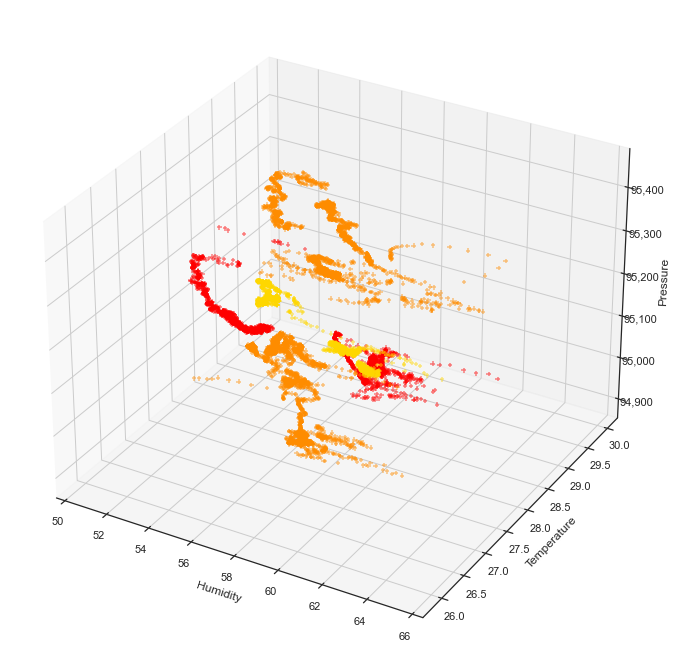

In [13]:
fig = plt.figure( figsize = ( 12, 12 ) )
ax = fig.add_subplot( 111, projection = '3d' )

conf = {
    'L': { 'c': 'gold', 'm': '+' },
    'M': { 'c': 'darkorange', 'm': '+' },
    'H': { 'c': 'red', 'm': '+' }
}

for name, group in df.groupby( 'occ' ):
    ax.scatter( group.hum, group.tem, group.pre, 
               c = conf[ name ][ 'c' ], 
               marker = conf[ name ][ 'm' ], alpha = 0.5 )
    
ax.set_xlabel( 'Humidity' )
ax.set_ylabel( 'Temperature' )
ax.set_zlabel( 'Pressure' )

fmt = '{x:,.0f}'
tick = mtick.StrMethodFormatter( fmt )
ax.zaxis.set_major_formatter( tick )

# fig.suptitle( 'Fitness Gym Temperature, Humidity, and Pressure' )

plt.show()
fig.savefig( os.path.join( *out_path, 'gym-env.png' ) )

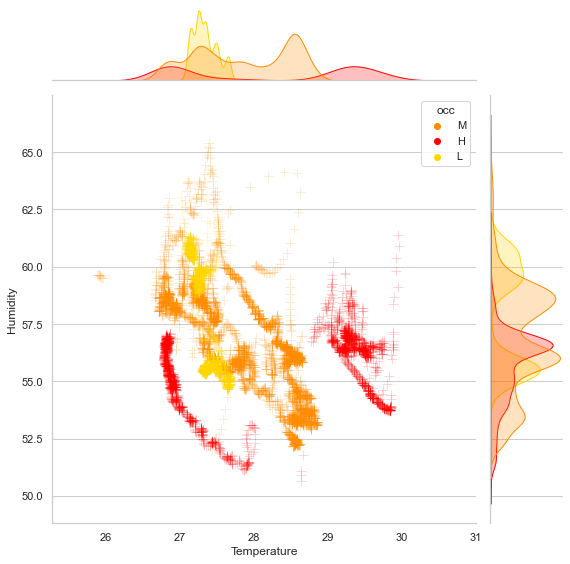

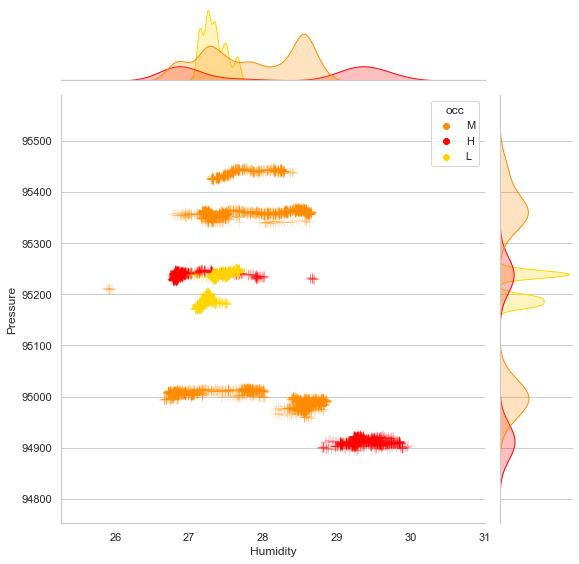

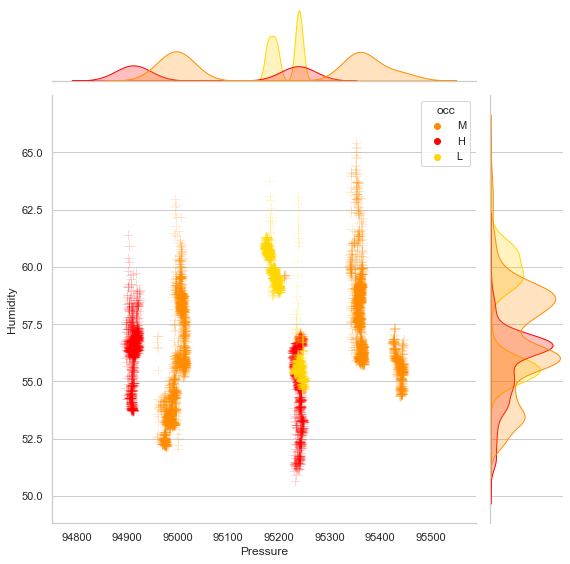

In [31]:
g = sns.JointGrid( data = df, x = 'tem', y = "hum", hue = 'occ', palette = colors, height = 8 )
g.plot_joint( sns.scatterplot, s = 100, alpha = .2, marker = '+',  )
g.plot_marginals( sns.kdeplot, fill = True )
g.set_axis_labels( 'Temperature', 'Humidity' )
g.savefig( os.path.join( *out_path, 'gym_tem_hum.png' ) )

g = sns.JointGrid( data = df, x = 'tem', y = "pre", hue = 'occ', palette = colors, height = 8 )
g.plot_joint( sns.scatterplot, s = 100, alpha = .2, marker = '+',  )
g.plot_marginals( sns.kdeplot, fill = True )
g.set_axis_labels( 'Humidity', 'Pressure' )
g.savefig( os.path.join( *out_path, 'gym_tem_pre.png' ) )

g = sns.JointGrid( data = df, x = 'pre', y = "hum", hue = 'occ', palette = colors, height = 8 )
g.plot_joint( sns.scatterplot, s = 100, alpha = .2, marker = '+',  )
g.plot_marginals( sns.kdeplot, fill = True )
g.set_axis_labels( 'Pressure', 'Humidity' )
g.savefig( os.path.join( *out_path, 'gym_pre_hum.png' ) )

## - Data Dispersion and Distribution

Text(0.5, 0, 'Pressure')

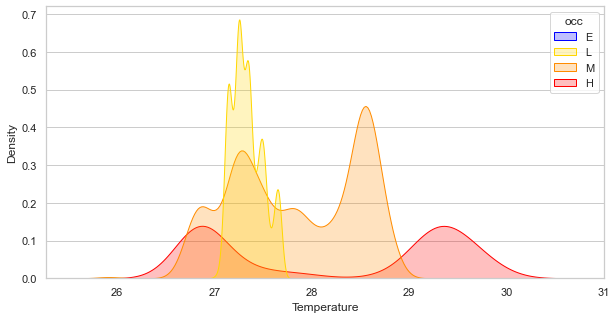

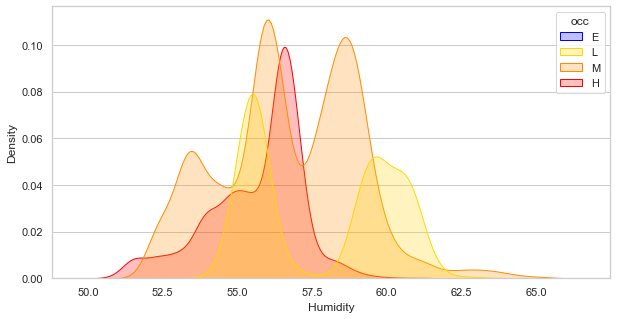

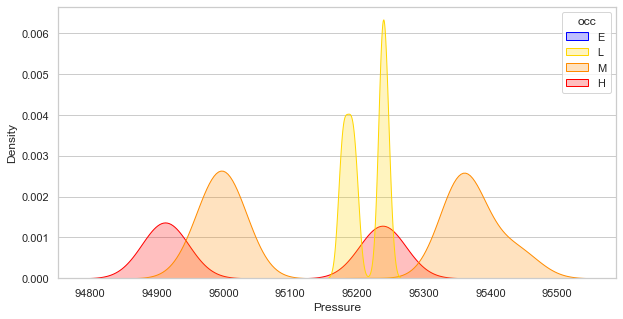

In [15]:
fmt = '{x:,.0f}'
tick = mtick.StrMethodFormatter( fmt )
order = [ 'E', 'L', 'M', 'H' ]

sns.set( style = 'whitegrid' )
fig, ax = plt.subplots( figsize = ( 10, 5 ) )
g = sns.kdeplot( data = df, x = 'tem', hue = 'occ', 
    fill = True, palette = colors, hue_order = order, ax = ax )
ax.set_xlabel( 'Temperature' )

fig, ax = plt.subplots( figsize = ( 10, 5 ) )
g = sns.kdeplot( data = df, x = 'hum', hue = 'occ', 
    fill = True, palette = colors, hue_order = order, ax = ax )
ax.set_xlabel( 'Humidity' )

fig, ax = plt.subplots( figsize = ( 10, 5 ) )
g = sns.kdeplot( data = df, x = 'pre', hue = 'occ', 
    fill = True, palette = colors, hue_order = order, ax = ax )
ax.set_xlabel( 'Pressure' )

In [11]:
# setting up

gini_path = 'gym-gini'
env_vars = [ 'pre', 'hum', 'tem' ]
levels = [ 'L', 'M', 'H' ]

scaled_df = df.copy()
scaled_df.loc[ :, env_vars ] = MinMaxScaler().fit_transform( scaled_df[ env_vars ] )
scaled_df.loc[ :, env_vars ] = pd.DataFrame( data = scaled_df, columns = env_vars + [ 'occ' ] )

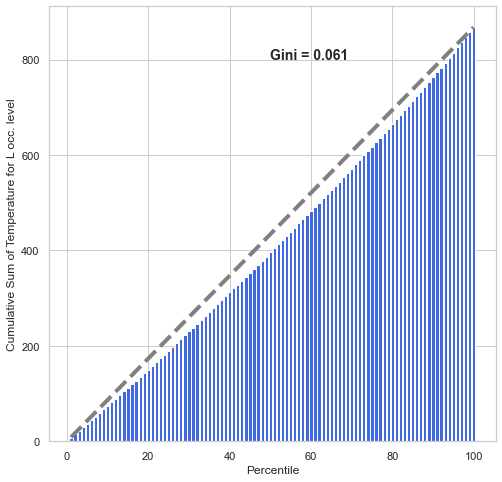

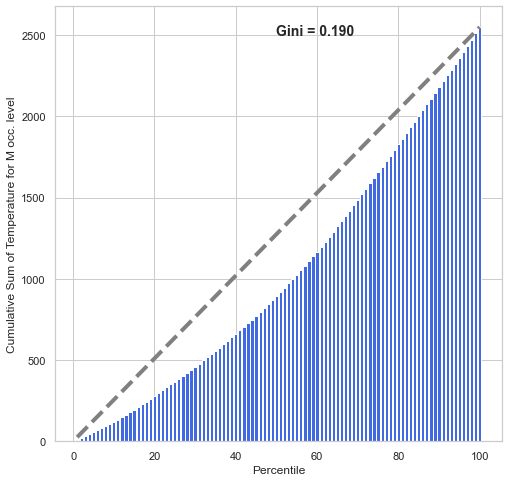

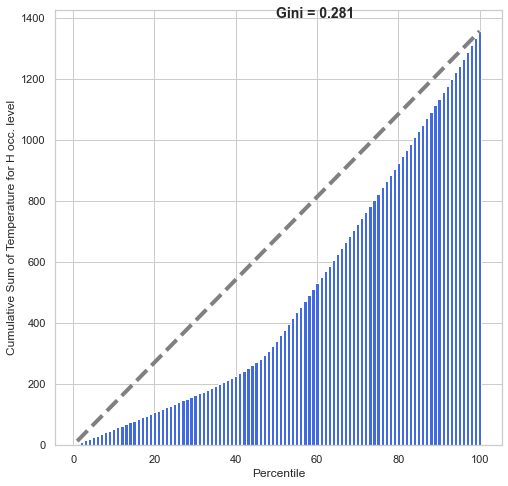

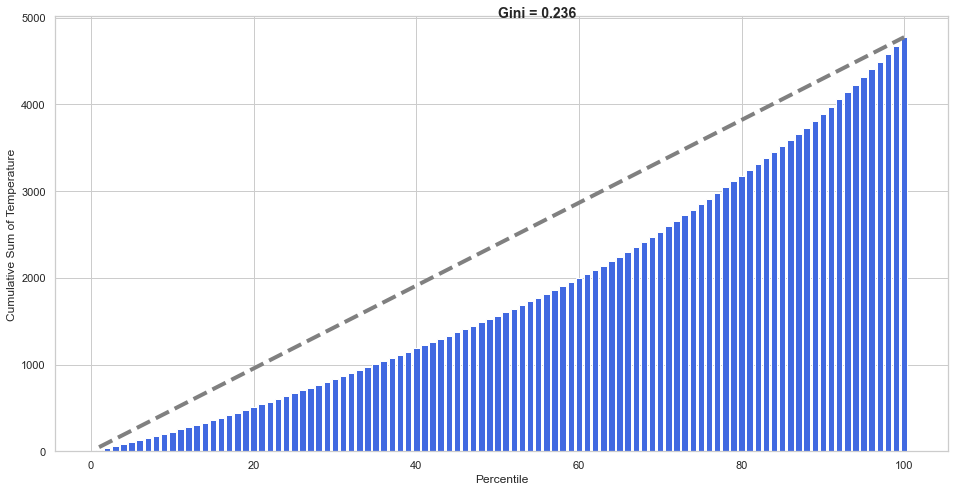

In [12]:
figs = env_var_lorenz_plots( scaled_df, 'royalblue', levels, 'tem', 'Temperature' )

for  l, f in zip( levels + [ 'total' ], figs ): 
    f.savefig( os.path.join( *out_path, gini_path, 'gym-tem-%s.png' % l ) )

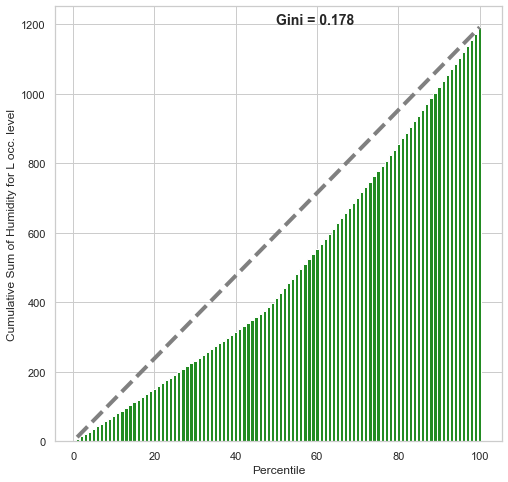

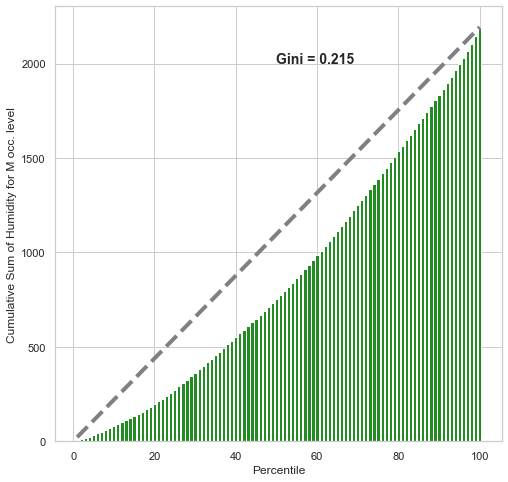

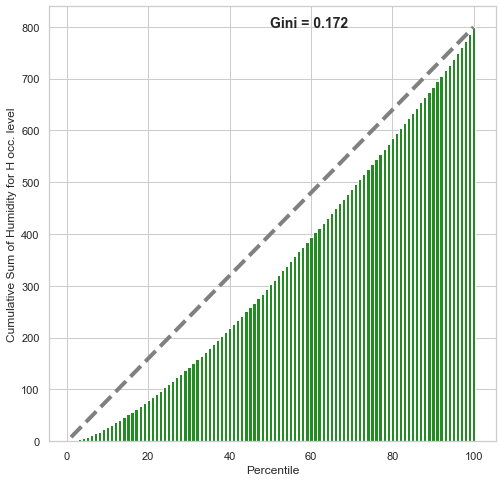

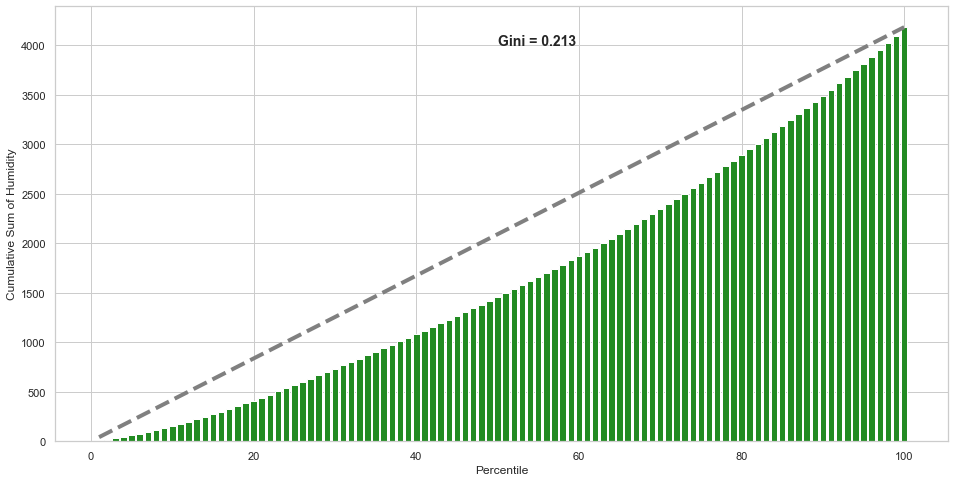

In [13]:
figs = env_var_lorenz_plots( scaled_df, 'forestgreen', levels, 'hum', 'Humidity' )

for  l, f in zip( levels + [ 'total' ], figs ): 
    f.savefig( os.path.join( *out_path, gini_path, 'gym-hum-%s.png' % l ) )

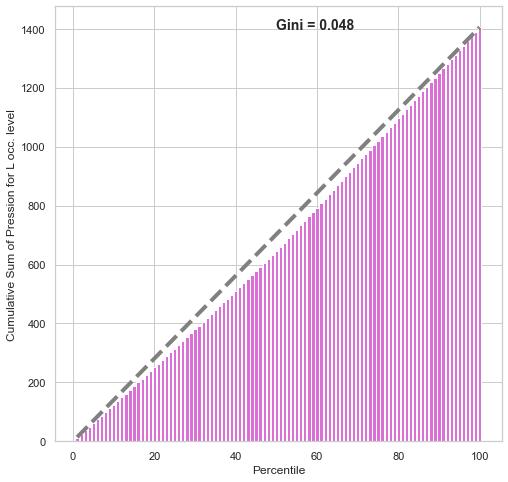

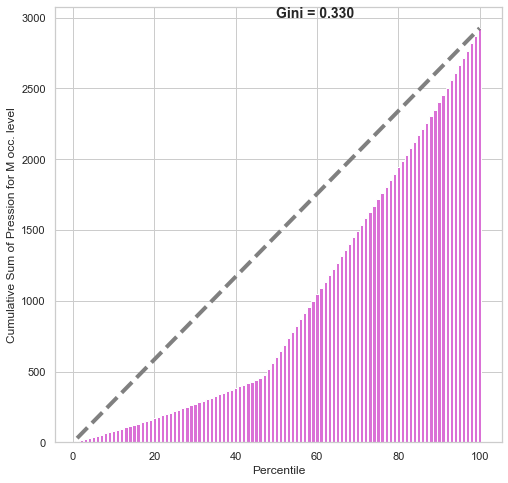

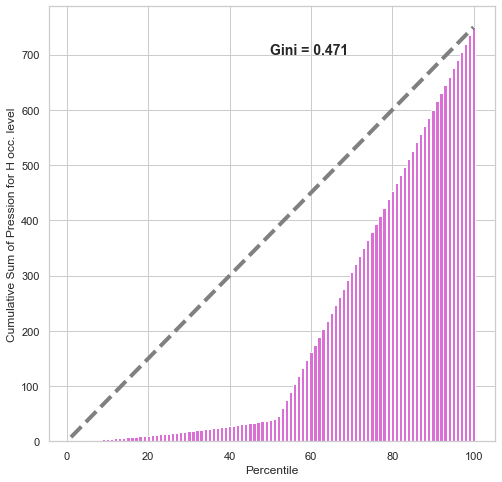

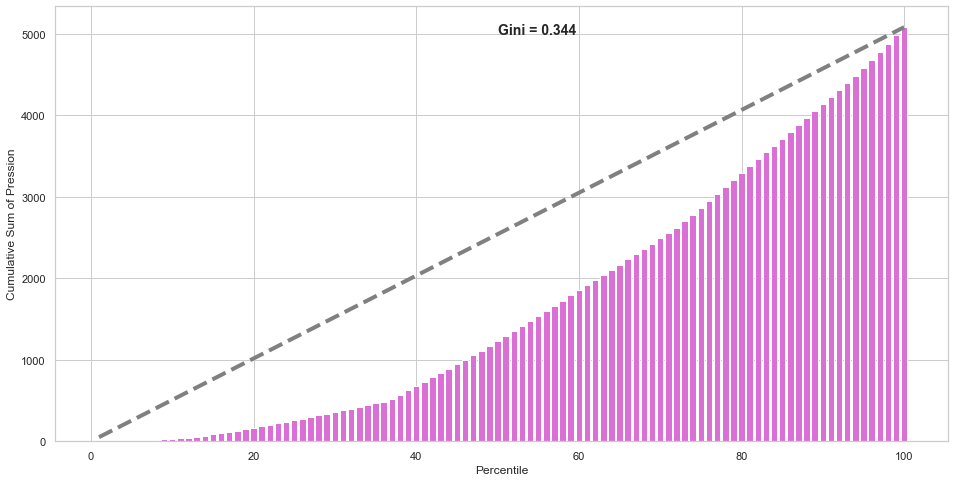

In [14]:
figs = env_var_lorenz_plots( scaled_df, 'orchid', levels, 'pre', 'Pression' )

for  l, f in zip( levels + [ 'total' ], figs ): 
    f.savefig( os.path.join( *out_path, gini_path, 'gym-pre-%s.png' % l ) )

## - Ranges of day Gini coeficients for occupancy levels

In [15]:
def occ_gini( occ_df ): 
    return occ_df[ env_vars ].apply( lambda col: gini( np.array( col ) ) )


def day_gini( day_df ):
    return day_df.groupby( 'occ' ).apply( occ_gini )

gini_path = 'gym-gini'
env_vars = [ 'pre', 'hum', 'tem' ]
levels = [ 'L', 'M', 'H' ]

temp = df.resample( '5min' ).apply( day_gini )

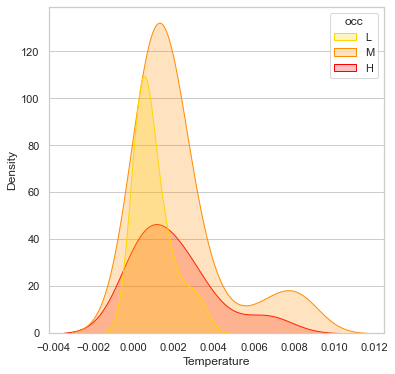

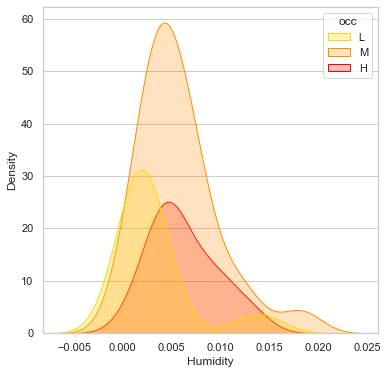

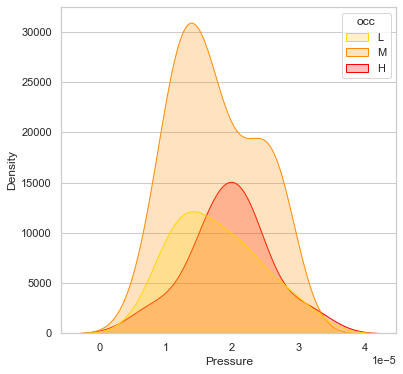

In [16]:
fig = plot_gini_by_day( temp, 'tem', 'Temperature', levels, colors, ( 6, 6 ) )
fig.savefig( os.path.join( *out_path, gini_path, 'gym-tem.png' ) )

fig = plot_gini_by_day( temp, 'hum', 'Humidity', levels, colors, ( 6, 6 ) )
fig.savefig( os.path.join( *out_path, gini_path, 'gym-hum.png' ) )

fig = plot_gini_by_day( temp, 'pre', 'Pressure', levels, colors, ( 6, 6 ) )
fig.savefig( os.path.join( *out_path, gini_path, 'gym-pre.png' ) )

In [30]:
temp.mean()

pre    0.000018
hum    0.005223
tem    0.001887
dtype: float64

# Merging fitness-gyma and living-room dataset

In [27]:
# loading living-room dataset

home_file = 'ds-home-1sec.csv'
df_home = pd.read_csv( os.path.join( *path, home_file ), index_col = 'date', parse_dates = [ 'date' ] ).drop( 'ven', axis = 1 )
df_home[ 'location' ] = [ 'living room' ] * len( df_home )

In [28]:
# merging boot datasets

df_merge = df_home.append( df )
df_merge

,pre,hum,tem,occ,location
date,,,,,
2020-05-14 21:08:39,94270.77,54.49,30.99,L,living room
2020-05-14 21:08:40,94268.36,54.46,30.99,L,living room
2020-05-14 21:08:41,94266.11,54.46,30.99,L,living room
2020-05-14 21:08:42,94268.52,54.49,30.99,L,living room
2020-05-14 21:08:43,94269.70,54.50,30.99,L,living room
...,...,...,...,...,...
2019-10-02 20:48:54,95191.05,59.12,27.20,L,gym
2019-10-02 20:48:55,95188.98,58.96,27.20,L,gym
2019-10-02 20:48:56,95189.48,58.86,27.20,L,gym


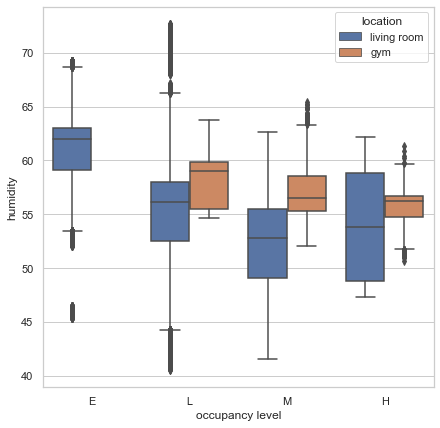

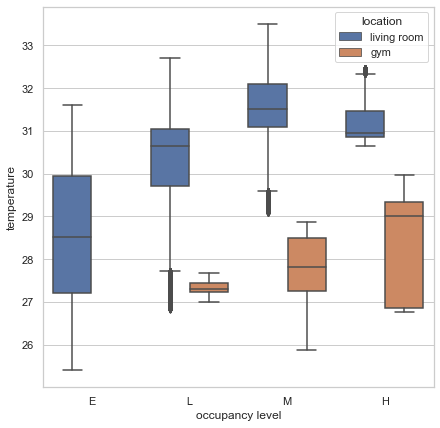

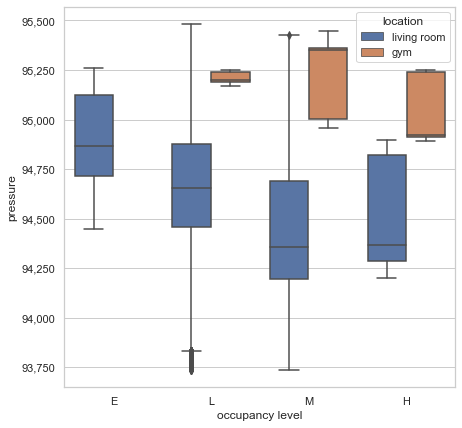

In [29]:
fmt = '{x:,.0f}'
tick = mtick.StrMethodFormatter( fmt )

fig, ax = plt.subplots( figsize = ( 7, 7 ) )
g = sns.boxplot( data = df_merge, x = 'occ', y = 'hum', hue = 'location', ax = ax, order = [ 'E' ] + levels )
ax.set( xlabel = 'occupancy level', ylabel = 'humidity' )
fig.savefig( os.path.join( *out_path, 'boxplot_hum.png' ) )

fig, ax = plt.subplots( figsize = ( 7, 7 ) )
g = sns.boxplot( data = df_merge, x = 'occ', y = 'tem', hue = 'location', ax = ax, order = [ 'E' ] + levels )
ax.set( xlabel = 'occupancy level', ylabel = 'temperature' )
fig.savefig( os.path.join( *out_path, 'boxplot_tem.png' ) )

fig, ax = plt.subplots( figsize = ( 7, 7 ) )
g = sns.boxplot( data = df_merge, x = 'occ', y = 'pre', hue = 'location', ax = ax, order = [ 'E' ] + levels )
ax.set( xlabel = 'occupancy level', ylabel = 'pressure' )
ax.yaxis.set_major_formatter( tick )
fig.savefig( os.path.join( *out_path, 'boxplot_pre.png' ) )

# fig.suptitle( 'Environmental variables distribution grouped by location' )
# fig.savefig( os.path.join( *out_path, 'boxplot_gym.png' ) )


In [ ]:
from collections import Counter

def plot_attr( df, attr, hue, ax, attr_name ):
    grouped = df.groupby( hue )
    temp = pd.DataFrame( { col: vals[ attr ] for col, vals in grouped } )
    
    means = temp.median()
    means.sort_values( ascending = False, inplace = True )
    temp = temp[ means.index ]
    g = temp.boxplot( ax = ax )
    g.set_title( attr_name )

    
fig, ax = plt.subplots( 1, 3, figsize = ( 18, 6 ) )

plot_attr( df, 'hum', 'occ', ax[ 0 ], 'Humidity' )
plot_attr( df, 'tem', 'occ', ax[ 1 ], 'Temperature' )
plot_attr( df, 'pre', 'occ', ax[ 2 ], 'Pressure' )
